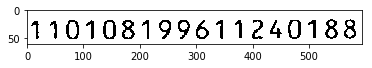

识别该身份证号码是:110108199611240 188
总共耗时：1.4790847301483154s


In [3]:
#-*-coding:utf-8-*-
import sys
import time
from PIL import Image
import pytesseract as pta
import matplotlib.pyplot as plt

# 二值化
def binarizing(img,threshold):
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img

# 去除干扰线
def depoint(img):   #input: gray image
    pixdata = img.load()
    w,h = img.size
    for y in range(1,h-1):
        for x in range(1,w-1):
            count = 0
            if pixdata[x,y-1] > 245:
                count = count + 1
            if pixdata[x,y+1] > 245:
                count = count + 1
            if pixdata[x-1,y] > 245:
                count = count + 1
            if pixdata[x+1,y] > 245:
                count = count + 1
            if count > 2:
                pixdata[x,y] = 255
    return img

# 身份证号码识别
def identity_OCR(pic_path):
    # 身份证号码截图
    img1=Image.open(pic_path)
    w,h=img1.size
    # 将身份证放大3倍（膨胀）
    out=img1.resize((w*3,h*3),Image.ANTIALIAS)
    region = (130*3,190*3,328*3,210*3)
    # 裁切身份证号码图片
    cropImg = out.crop(region)
    # 转化为灰度图
    img= cropImg.convert('L')
    # 把图片变成二值图像，并显示
    img1=binarizing(img,100)
    img2=depoint(img1)
    plt.imshow(img2)
    plt.show()
    # 调用识别方法
    code = pta.image_to_string(img2, lang='chi_sim')
    print ("识别该身份证号码是:"+ str(code))

if __name__ == '__main__':
    # 计时起点
    time1 = time.time()
    pic_path="yangzheng.jpg"
    identity_OCR(pic_path)
    # 计时终点
    time2 = time.time()
    print (u'总共耗时：' + str(time2 - time1) + 's')